In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/college_data (1).csv')

In [ ]:
df

,College,Study_Hours,Exam_Score,Access_Resources
0,Alpha,5.7,43.5,No
1,Alpha,5.2,44.1,Yes
2,Alpha,9.3,71.5,Yes
3,Alpha,7.1,59.2,No
4,Alpha,9.9,74.6,No
...,...,...,...,...
95,Beta,4.1,62.6,Yes
96,Beta,4.8,84.9,No
97,Beta,8.6,40.0,No
98,Beta,2.2,64.1,Yes


Calculation of Mean, Median, Mode, Standard Deviation and Range for Study_Hours and Exam_Scores

In [ ]:
from statistics import mode

# Function to get stats for a college
def get_college_stats(df, college_name):
    college_df = df[df['College'] == college_name]
    stats = {}
    for column in ['Study_Hours', 'Exam_Score']:
        try:
            mode_value = mode(college_df[column])
        except:
            mode_value = "No unique mode"
        stats[column] = {
            'Mean': round(college_df[column].mean(), 2),
            'Median': round(college_df[column].median(), 2),
            'Mode': mode_value,
            'Standard Deviation': round(college_df[column].std(), 2),
            'Range': round(college_df[column].max() - college_df[column].min(), 2)
        }
    return stats

# Get stats for both colleges
alpha_stats = get_college_stats(df, "Alpha")
beta_stats = get_college_stats(df, "Beta")

# Combine into a single DataFrame for nice display
summary_df = pd.DataFrame({
    'Study_Hours (Alpha)': alpha_stats['Study_Hours'],
    'Exam_Score (Alpha)': alpha_stats['Exam_Score'],
    'Study_Hours (Beta)': beta_stats['Study_Hours'],
    'Exam_Score (Beta)': beta_stats['Exam_Score']
})

print("\n---Statistics ---")
print(summary_df)



---Statistics ---
                    Study_Hours (Alpha)  Exam_Score (Alpha)  \
Mean                               5.36               69.64   
Median                             5.55               72.65   
Mode                               5.70               44.10   
Standard Deviation                 2.55               16.53   
Range                              8.60               59.70   

                    Study_Hours (Beta)  Exam_Score (Beta)  
Mean                              5.70              69.58  
Median                            6.00              68.45  
Mode                              6.00              43.30  
Standard Deviation                2.15              18.13  
Range                             8.30              57.70  


Histogram of Exam_Scores per college

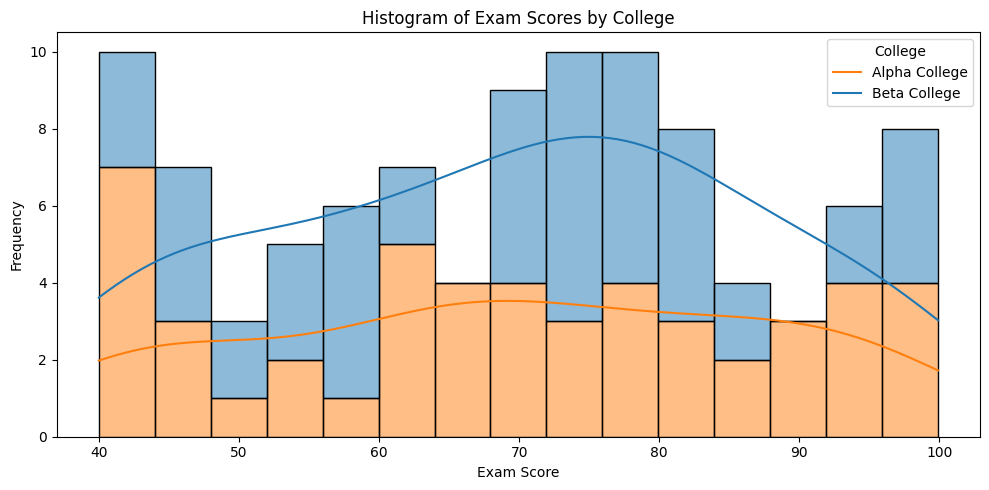

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Exam_Score', hue='College', kde=True, bins=15, multiple='stack')
plt.title('Histogram of Exam Scores by College')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.legend(title='College', labels=['Alpha College', 'Beta College'])
plt.tight_layout()
plt.show()

Boxplot comparing Study_Hours between the two colleges

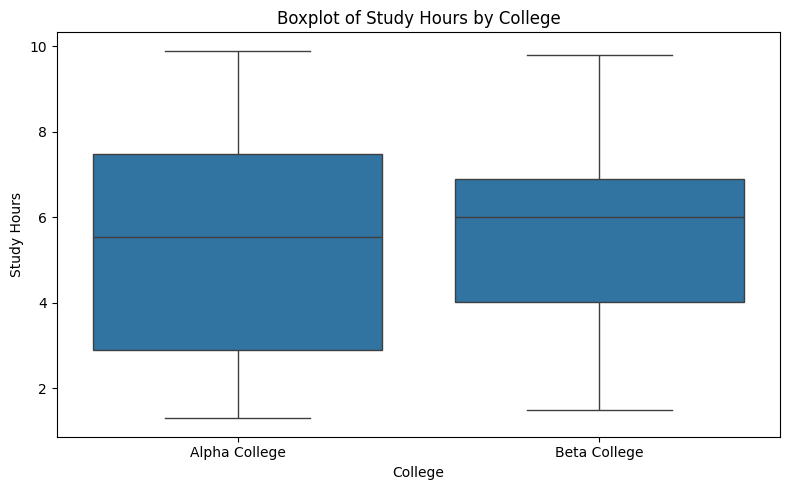

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='College', y='Study_Hours')
plt.title('Boxplot of Study Hours by College')
plt.xlabel('College')
plt.ylabel('Study Hours')
plt.xticks([0, 1], ['Alpha College', 'Beta College'])
plt.tight_layout()
plt.show()

**Interpretation:**

**Average Performance:** Based on the mean exam scores, the college with the higher average demonstrates better academic performance i.e., Alpha College has a higher mean Exam_Score of 69.64, and shows better average performance.

**Variability in Study Hours:** The standard deviation or the spread in the boxplot indicates variability. The college with the wider spread or larger standard deviation in Study_Hours i.e.; Alpha College with 2.55 has higher variability in Study_Hours.



**Two-Sample t-test**

**Null Hypthosis:** mean exam score differs significantly between the two colleges.

**Alternative Hypthosis:** mean exam score doesnot differs significantly between the two colleges.

In [ ]:
from scipy.stats import ttest_ind

# Filter Exam Scores by College
alpha_scores = df[df['College'] == 'Alpha']['Exam_Score']
beta_scores = df[df['College'] == 'Beta']['Exam_Score']

# Perform two-sample independent t-test
t_stat, p_value = ttest_ind(alpha_scores, beta_scores, equal_var=False)  # Welch's t-test

# Output results
print("Two-Sample Independent t-test:")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")


Two-Sample Independent t-test:
t-statistic = 0.0173
p-value = 0.9862


If **p-value < 0.05,** reject the null hypothesis → **there is a** **significant difference** in mean exam scores.

If **p-value ≥ 0.05,** fail to reject the null hypothesis → no significant difference in means.

Hence we go with **null hypthosis**

**Chi-Square Test**

**Null Hypothesis (H₀):** Access to resources is independent of the college.

**Alternative Hypothesis (H₁):** Access to resources is dependent on the college.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['College'], df['Access_Resources'])
print("Contingency Table (Observed):\n", contingency_table)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Convert expected to a DataFrame for readability
expected_table = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Output results
print("\nExpected Frequencies:\n", expected_table)
print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


Contingency Table (Observed):
 Access_Resources  No  Yes
College                  
Alpha             24   26
Beta              23   27

Expected Frequencies:
 Access_Resources    No   Yes
College                     
Alpha             23.5  26.5
Beta              23.5  26.5

Chi-Square Statistic: 0.0000
P-Value: 1.0000


If **p-value < 0.05:** Reject H₀ → There is a significant association between College and Access to Resources.

If **p-value ≥ 0.05:** Fail to reject H₀ → No significant association (they are likely independent).

We accept Null Hypthosis

**Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['Study_Hours']]  # Feature
y = df['Exam_Score']     # Target

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Get slope (coefficient), intercept, R²
slope = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y, y_pred)

# Print Regression Equation and Metrics
print(f"Regression Equation: Exam_Score = {slope:.2f} * Study_Hours + {intercept:.2f}")
print(f"Slope (m): {slope:.4f}")
print(f"Intercept (b): {intercept:.4f}")
print(f"R-squared (R²): {r_squared:.4f}")


Regression Equation: Exam_Score = 1.05 * Study_Hours + 63.79
Slope (m): 1.0529
Intercept (b): 63.7858
R-squared (R²): 0.0206


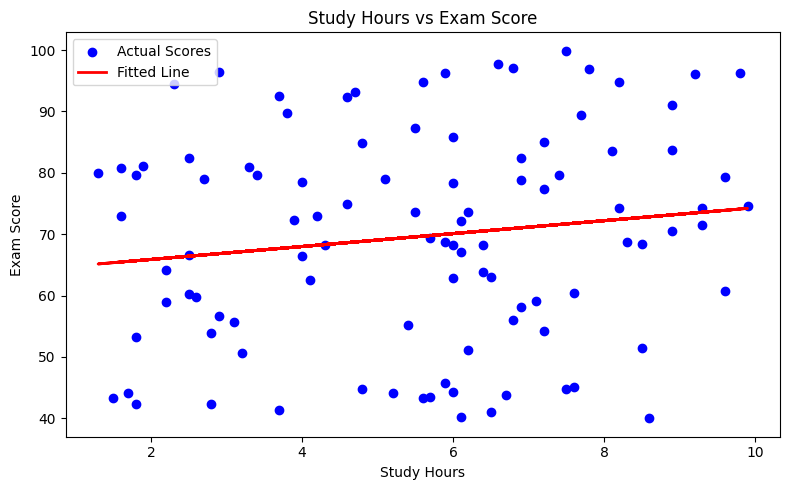

In [ ]:
# Scatterplot with regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.tight_layout()
plt.show()


**Multiple Regression**

In [ ]:
import statsmodels.api as sm

# Encode 'Access_Resources': Yes = 1, No = 0
df['Access_Resources_Binary'] = df['Access_Resources'].map({'Yes': 1, 'No': 0})

# Independent variables
X = df[['Study_Hours', 'Access_Resources_Binary']]
X = sm.add_constant(X)  # Adds intercept

# Dependent variable
y = df['Exam_Score']

In [ ]:
# Fit the model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.076
Date:                Sat, 14 Jun 2025   Prob (F-statistic):              0.345
Time:                        04:34:43   Log-Likelihood:                -425.14
No. Observations:                 100   AIC:                             856.3
Df Residuals:                      97   BIC:                             864.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     